In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
consumerKey="zmqnvhBabWtNMBrDVD90z0Qb4"
consumerSecret="rV746nzhp9BtuPAmRzPZx7XDZGVE5m8syF94t40whk0EhtbVgJ"
accessToken="1240866504964358144-HhPA5uVKhjSBfU2YZZG1n4wKYFSlpJ"
accessSecertToken="Iqg2eZmyaNWbVrwCMDVrupeKTFhKqfcLA7aEhd5XBXxZM"

In [4]:
auth=tweepy.OAuthHandler(consumerKey, consumerSecret)

auth.set_access_token(accessToken,accessSecertToken)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

for tweet in posts[0:5]:
    print(tweet.full_text+'\n')

RT @trevormundel: This commitment is critical. “Additional manufacturing capacity to begin producing doses for every country, not just the…

Teaching special education takes an amazing person to figure out exactly what works for each child. Talking with Washington State Teacher of the Year Amy Campbell gave me an even greater appreciation for these educators: https://t.co/YIxI1eoMkG https://t.co/kOY0tciVAp

RT @antonioguterres: Last month, over 1 billion students were affected by #COVID19 school closures.

Even before the pandemic, the world wa…

Our foundation is partnering with @DonorsChoose to support teachers as they get ready to go back to school—in whatever form that takes—and will boost your donations to the classroom project of your choice today. https://t.co/nh3CnQI9vm

I always look forward to meeting Washington’s Teacher of the Year. This year’s recipient, Amy Campbell (@The_MrsCampbell), is a remarkable advocate for her students, and I loved learning about her approach to t

In [6]:
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,RT @trevormundel: This commitment is critical....
1,Teaching special education takes an amazing pe...
2,"RT @antonioguterres: Last month, over 1 billio..."
3,Our foundation is partnering with @DonorsChoos...
4,I always look forward to meeting Washington’s ...


In [10]:
def cleanTxt(text):
    text=re.sub(r"@[A-Za-z0-9]+",'',text)
    text=re.sub(r"#",'',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?\/\/\S+','',text)
    text=re.sub(r':','',text)
    
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

df

,Tweets
0,This commitment is critical. “Additional manu...
1,Teaching special education takes an amazing pe...
2,"Last month, over 1 billion students were affe..."
3,Our foundation is partnering with to support ...
4,I always look forward to meeting Washington’s ...
...,...
95,When Warren Buffett donated the bulk of his fo...
96,Diseases that cause dementia are only diagnose...
97,We’re hopeful that our foundation’s work with ...
98,It was a magical night. I'm very happy to supp...


In [11]:
def getsub(text):
    return TextBlob(text).sentiment.subjectivity

def ploar(text):
    return TextBlob(text).sentiment.polarity
df['sub']=df['Tweets'].apply(getsub)
df['plo']=df['Tweets'].apply(ploar)


df

,Tweets,sub,plo
0,This commitment is critical. “Additional manu...,0.800000,0.000000
1,Teaching special education takes an amazing pe...,0.555357,0.426786
2,"Last month, over 1 billion students were affe...",0.066667,0.000000
3,Our foundation is partnering with to support ...,0.250000,0.100000
4,I always look forward to meeting Washington’s ...,0.707143,0.602381
...,...,...,...
95,When Warren Buffett donated the bulk of his fo...,0.000000,0.000000
96,Diseases that cause dementia are only diagnose...,0.651667,0.270000
97,We’re hopeful that our foundation’s work with ...,0.657778,0.131111
98,It was a magical night. I'm very happy to supp...,0.966667,0.800000


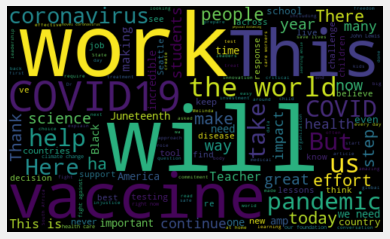

In [12]:
allword=' '.join([twts for twts in df['Tweets']])
word=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allword)

plt.imshow(word,interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
def getana(score):
    if score<0:
        return 'neg'
    elif score==0:
        return 'netural'
    else:
        return 'positive'

df['analysis']=df['plo'].apply(getana)

df

,Tweets,sub,plo,analysis
0,This commitment is critical. “Additional manu...,0.800000,0.000000,netural
1,Teaching special education takes an amazing pe...,0.555357,0.426786,positive
2,"Last month, over 1 billion students were affe...",0.066667,0.000000,netural
3,Our foundation is partnering with to support ...,0.250000,0.100000,positive
4,I always look forward to meeting Washington’s ...,0.707143,0.602381,positive
...,...,...,...,...
95,When Warren Buffett donated the bulk of his fo...,0.000000,0.000000,netural
96,Diseases that cause dementia are only diagnose...,0.651667,0.270000,positive
97,We’re hopeful that our foundation’s work with ...,0.657778,0.131111,positive
98,It was a magical night. I'm very happy to supp...,0.966667,0.800000,positive


In [16]:
j=1
sotdf=df.sort_values(by=['plo'])
for i in range(0,sotdf.shape[0]):
    if sotdf['analysis'][i]=='positive':
        print(str(j)+')'+sotdf['Tweets'][i])
        print()
        j=j+1

1)Teaching special education takes an amazing person to figure out exactly what works for each child. Talking with Washington State Teacher of the Year Amy Campbell gave me an even greater appreciation for these educators  

2)Our foundation is partnering with  to support teachers as they get ready to go back to school—in whatever form that takes—and will boost your donations to the classroom project of your choice today. 

3)I always look forward to meeting Washington’s Teacher of the Year. This year’s recipient, Amy Campbell (_MrsCampbell), is a remarkable advocate for her students, and I loved learning about her approach to teaching special ed. 

4)The world did not do enough to prepare for a pandemic. We can avoid making the same mistake with climate change by

1. Letting science and innovation lead the way
2. Making sure solutions work for poor countries too
3. Getting started now



5)Great tips from _Bergstrom about how to find reliable sources of information and test claims you

In [17]:
j=1
sotdfn=df.sort_values(by=['plo'],ascending=False)
for i in range(0,sotdfn.shape[0]):
    if sotdfn['analysis'][i]=='neg':
        print(str(j)+')'+sotdfn['Tweets'][i])
        print()
        j=j+1

1) Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries
🔸 Screening…

2)Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

3) “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

4) “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

5) Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

6)_Nyongo 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

7)…in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

8)The horrifying killings of 

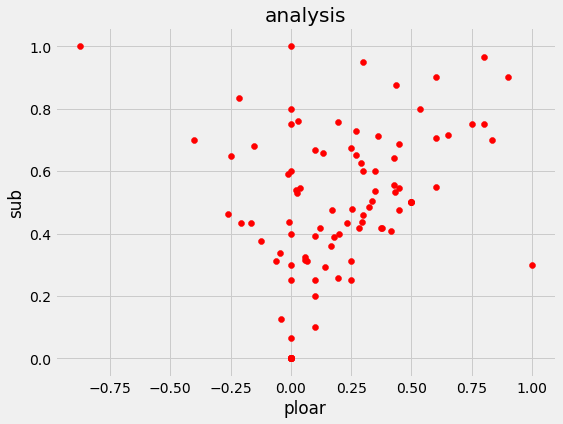

In [19]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df["plo"][i],df['sub'][i],color="Red")
    
plt.title("analysis")
plt.xlabel('ploar')
plt.ylabel("sub")
plt.show()

In [21]:
pt=df[df.analysis=="positive"]
pt=pt['Tweets']

round((pt.shape[0]/df.shape[0])*100,1)

65.0

In [22]:
nt=df[df.analysis=="neg"]
nt=nt['Tweets']

round((nt.shape[0]/df.shape[0])*100,1)

14.0

In [23]:
n=df[df.analysis=="netural"]
n=n['Tweets']

round((n.shape[0]/df.shape[0])*100,1)

21.0